In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
x = np.array(list(range(2, 13)))
x

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [4]:
r = range(1, 7)
sample = [(i, j) for i in r for j in r]

px = []

for i in range(2, 13):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))

px = np.array(px)
px

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [5]:
ex = np.sum(x * px)
ex.round(3)

7.0

In [6]:
x = np.arange(2, 13)
px = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])
X = stats.rv_discrete(values=(x, px))

In [7]:
x_ev = X.expect()
round(x_ev, 3)

7.0

In [8]:
x_samples = np.random.choice(x, size=1000000, p=px)

In [9]:
np.mean(x_samples).round(3)

7.001

In [10]:
coin = range(0, 2)
die = range(1, 7)

sample = [(c, d) for c in coin for d in die]
list(sample)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6)]

In [11]:
px = []
for i in range(1, 8):
    event = [roll for roll in sample if sum(roll) == i]
    px.append(len(event) / len(sample))
    print(f"P(X + Y = {i}) = {len(event)} / {len(sample)}")


P(X + Y = 1) = 1 / 12
P(X + Y = 2) = 2 / 12
P(X + Y = 3) = 2 / 12
P(X + Y = 4) = 2 / 12
P(X + Y = 5) = 2 / 12
P(X + Y = 6) = 2 / 12
P(X + Y = 7) = 1 / 12


In [12]:
x = np.arange(1, 8)
sum(x * px)

4.0

In [13]:
r = range(0, 2)
sample = [(i, j, w) for i in r for j in r for w in r]

for i in range(0, 4):
    event = [toss for toss in sample if sum(toss) * toss[0] == i]
    print(f"P(Z = {i}) : {len(event)} / {len(sample)}")

P(Z = 0) : 4 / 8
P(Z = 1) : 1 / 8
P(Z = 2) : 2 / 8
P(Z = 3) : 1 / 8


In [14]:
z = np.array([0, 1, 2, 3])
pz = np.array([4/8, 1/8, 2/8, 1/8])
sum(z * pz)

1.0

In [15]:
x = np.arange(2, 13)
px = np.array(
    [
        1 / 36,
        2 / 36,
        3 / 36,
        4 / 36,
        5 / 36,
        6 / 36,
        5 / 36,
        4 / 36,
        3 / 36,
        2 / 36,
        1 / 36,
    ]
)
X = stats.rv_discrete(values=(x, px))
ex = X.expect()
ex

6.999999999999998

In [16]:
((x - ex) ** 2 * px).sum()

5.833333333333333

In [17]:
X.var()

5.833333333333364

In [18]:
y = np.array([0, 1])
py = np.array([0.2, 0.8])

sum(y**2 * py) - (sum(y * py)) ** 2

0.15999999999999992

In [19]:
x = np.array([2, 1, 4, 7])
y = 100 + 2 * x

np.var(y) == 2**2 * np.var(x)

True

In [20]:
x = np.array([2, 1, 4, 7])
y = np.array([1, 3, 5, 11])

np.var(x + y, ddof=0)

35.25

In [21]:
np.var(x, ddof=0) + np.var(y, ddof=0) + 2 * np.cov(x, y, ddof=0)[0, 1]

35.25

In [22]:
# Set up the population distribution
population = np.random.normal(loc=50, scale=10, size=10000)

# Set up the sample size and number of samples
sample_size = 30
num_samples = 100000

# Create an array to hold the sample means
sample_means = np.zeros(num_samples)

# Generate the samples and compute their means
for i in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means[i] = np.mean(sample)

# Calculate the variance of the sample means
sampling_dist_mean_var = np.var(sample_means)
sampling_dist_mean_var

3.3590999399683525

In [23]:
10**2 / 30

3.3333333333333335

In [24]:
x = np.arange(7)
print(x)

[0 1 2 3 4 5 6]


In [25]:
px = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
print(px)

(0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)


In [26]:
np.sum(px)

1.0

In [27]:
X = stats.rv_discrete(name='rv', values=(x, px))

In [28]:
# Distribuzione di massa di probabilità di X.
print(X.pmf(x))

[0.1 0.2 0.3 0.1 0.1 0.  0.2]


In [29]:
# Distribuzione comulativa di probabilità di X.
print(X.cdf(x))

[0.1 0.3 0.6 0.7 0.8 0.8 1. ]


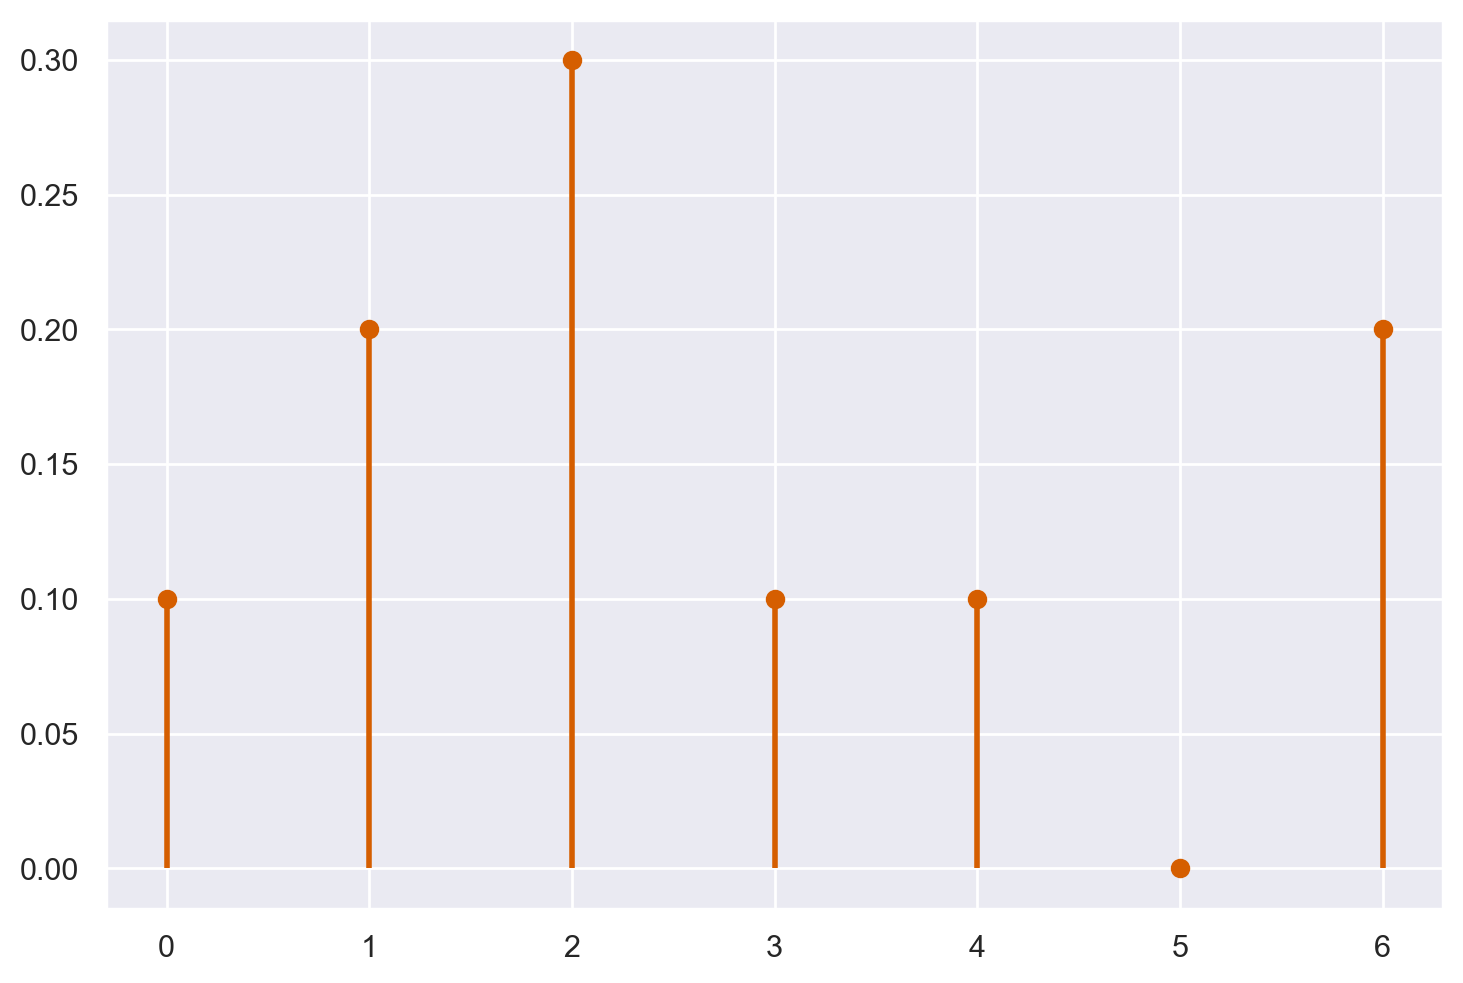

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pmf(x), "ro", ms=6, mec="r")
ax.vlines(x, 0, X.pmf(x), colors="r", lw=2)
plt.show()


In [31]:
x_ev = (x * px).sum()
x_ev

2.7

In [32]:
x_ev = X.expect()
x_ev

2.7

In [33]:
x_var = ((x - x_ev)**2 * X.pmf(x)).sum()
x_var

3.8100000000000005

In [34]:
X.var()

3.8099999999999987

In [35]:
np.sqrt(x_var)

1.9519221295943137

In [36]:
X.std()

1.9519221295943132

In [37]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Sun Jan 28 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

numpy     : 1.26.2
scipy     : 1.11.4
arviz     : 0.17.0
matplotlib: 3.8.2
seaborn   : 0.13.0

Watermark: 2.4.3

